# Single populations

<!-- * Single populations
  * Are there *any* single populations? 
  * Exponential growth
    * Metabolic basis
  * From populations to alleles
    * Basic pop gen
  * Logistic growth
    * Density dependence
    * Logistic growth as an "effective" model
      * SIS model (VJ)
    * Bifurcations (+Intro to theory - VJ) 
  * Evolutionary dynamics
  * Stochasticity
  * Applications/Examples
  * Stage and age structured populations
    * Stage- vs Age-structured models
    * IPMs
  * Applications/Examples -->

Here, we will explore Discrete growth (difference equations) vs. Continuous growth (differential equations), how cell division (inherently discrete) can be approximated by continuous models at large population sizes, and Simple ways to incorporate metabolic effects of temperature and cell size into these models. We will focus on microbes for the same reason we did so in the previous chapter.

## Discrete (Geometric) Growth

Consider a microbial population that reproduces synchronously once per time step (e.g., once every 1 hour, or 1 day, etc.). 

### Basic Model

If $N_t$ denotes the population at time (step) $t$, then a simple discrete growth model is:

$$ N_{t+1} = r \times N_t. $$

Here:
- $r$ is the multiplicative factor ($r > 1$ for growth, $r < 1$ for decay). 
- Over $T$ steps, $N_T = r^T \times N_0$.

### Example: Synchronous Cell Division
Each microbial cell divides into two after a fixed time step. Then $r=2$. So,

$$ N_{t+1} = 2 N_t. $$

In practice, real cells do not all divide at the exact same moment—division is somewhat stochastic. But if we look at average behavior, we might treat it as a discrete doubling event (especially in a simplified model).

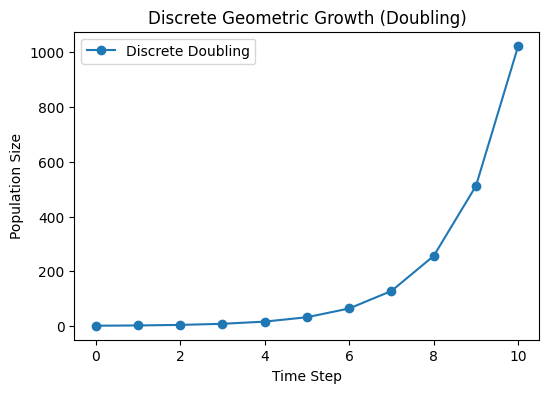

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the discrete model
r = 2.0        # Synchronous doubling factor
N0 = 1         # Initial population (say, 1 cell)
tmax = 10      # Number of discrete time steps

# Initialize
N_discrete = [N0]
for t in range(tmax):
    N_next = r * N_discrete[-1]
    N_discrete.append(N_next)

# Plot
time_points = np.arange(tmax+1)
plt.figure(figsize=(6,4))
plt.plot(time_points, N_discrete, marker='o', label='Discrete Doubling')
plt.xlabel('Time Step')
plt.ylabel('Population Size')
plt.title('Discrete Geometric Growth (Doubling)')
plt.legend()
plt.show()

## Continuous Growth

In continuous models, we treat population growth as happening at every instant rather than in discrete steps.

### Exponential Growth
A continuous model can be written as a differential equation:

$$
    \frac{dN}{dt} = \mu N(t),
$$

where $\mu$ is the intrinsic growth rate (per unit time). The solution is:

$$
    N(t) = N(0)  e^{\mu t}.
$$

When interpreted at large population sizes, this model can approximate the effect of many asynchronous cell divisions happening randomly but with an average rate $\mu$.

### relationship to Discrete Growth
If in the discrete model $N_{t+1} = r N_t$, after $T$ time steps, $N_T = r^T N_0$. Comparing with $N(t) = N_0 e^{\mu t}$ for the continuous case, we often identify:

$$
    r = e^{\mu \Delta t},
$$

assuming each time step is $\Delta t$. So

$$
    \mu = \frac{1}{\Delta t} \ln(r).
$$

Thus, discrete and continuous models are conceptually linked. As $\Delta t\rightarrow 0$, discrete growth steps become more closely approximated by a continuous growth process.

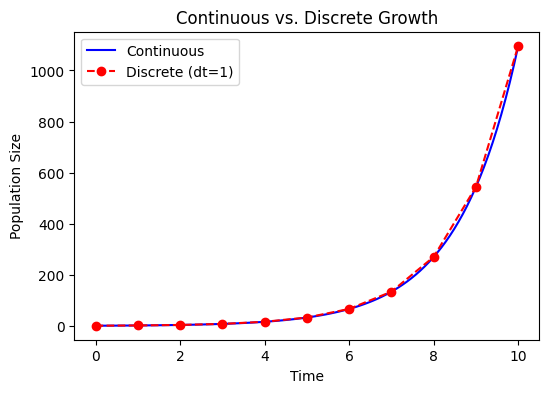

In [2]:
# Let's compare discrete and continuous growth numerically.

mu = 0.7      # continuous growth rate per time unit
N0_cont = 1   # initial population
t_end = 10.0  # total time

# We'll solve dN/dt = mu N(t) analytically:
def N_continuous(t, N0, mu):
    return N0 * np.exp(mu * t)

# And for discrete steps, let's pick a time step dt.
dt = 1.0
r_derived = np.exp(mu*dt)

# We'll do 10 steps, each of length dt=1:
num_steps = int(t_end/dt)
N_discrete_model = [N0_cont]
for step in range(num_steps):
    N_next = r_derived * N_discrete_model[-1]
    N_discrete_model.append(N_next)

# Now we'll sample the continuous solution at integer times
time_array = np.linspace(0, t_end, 100)
N_continuous_vals = [N_continuous(t, N0_cont, mu) for t in time_array]

# Plot both
plt.figure(figsize=(6,4))
plt.plot(time_array, N_continuous_vals, 'b-', label='Continuous')
plt.plot(np.arange(num_steps+1), N_discrete_model, 'ro--', label='Discrete (dt=1)')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Continuous vs. Discrete Growth')
plt.legend()
plt.show()

## Incorporating Metabolic Effects

### Temperature Dependence
Enzymatic processes in the cell generally speed up with increasing temperature (until proteins denature at high $T$). For simplicity, we can model $\mu$ (or $r$) via an Arrhenius‐type expression:

$$
    \mu(T) = \mu_0 \exp\Bigl(-\frac{E}{k_B T}\Bigr),
$$

where,
- $E$ is an activation energy,
- $k_B$ is Boltzmann's constant (or simply a scaling constant in some biological contexts),
- $\mu_0$ is a pre‐exponential factor.

### Cell‐Size Scaling (MTE)

From the Metabolic Theory of Ecology (MTE), we often assume metabolism (and hence growth rate) scales as $M^{b-1}$, where $M$ is cell mass. Thus,

$$
    \mu(T,M) = \mu_0 M^{b-1} \exp\Bigl(-\frac{E}{k_B T}\Bigr).
$$

For microbes, we might treat $M$ as roughly constant (if cell size doesn't change much), or we can incorporate cell growth in more advanced models.

## Logistic Growth with Temperature & Size Dependence

recall from the previous chapter:

$$
    \frac{dN}{dt} = r(T,M)  N \Bigl(1 - \frac{N}{K}\Bigr).
$$

where $K$ is the carrying capacity (the maximum population or density). Here we can plug in:

$$
    r(T,M) = \mu_0  M^{b-1}  \exp \Bigl(-\frac{E}{k_B T}\Bigr).
$$

Then:

$$
\frac{dN}{dt} = \Bigl[
  \underbrace{
    r_0 M^{-\tfrac{1}{4}} 
    \exp \Bigl(-\tfrac{E}{k_B T}\Bigr)
  }_{\text{Temperature \& size dependent rate}}
\Bigr]
 N
 \Bigl(1 - \tfrac{N}{K}\Bigr).
$$

<!-- Below, we do a simple numerical integration of this logistic equation. -->

In [3]:
# # Let's do a quick numerical simulation.

# def dNdt(N, t, mu0, M, E, kB, T, K):
#     """right-hand side of logistic equation with temperature & size dependence."""
#     mu = mu0 * (M(-0.25)) * np.exp(-E/(kB*T))
#     return mu * N * (1 - N/K)

# def logistic_sim(N0, mu0, M, E, kB, T, K, t_end, dt=0.01):
#     """Numerical integration of the logistic equation using Euler's method."""
#     times = np.arange(0, t_end+dt, dt)
#     N_array = np.zeros_like(times)
#     N_array[0] = N0
#     for i in range(1, len(times)):
#         N_current = N_array[i-1]
#         t_current = times[i-1]
#         # Euler step
#         growth_rate = dNdt(N_current, t_current, mu0, M, E, kB, T, K)
#         N_next = N_current + growth_rate * dt
#         if N_next < 0:
#             N_next = 0
#         N_array[i] = N_next
#     return times, N_array

# # Parameters
# N0_log = 10       # initial population
# mu0 = 1.0         # base rate factor
# M = 1e-12         # cell mass (arbitrary units)
# E = 0.65          # effective activation energy
# kB = 0.001987     # Boltzmann-like constant (~ 1/rT scaling) - toy example
# T = 300.0         # temperature (K)
# K = 1000.0        # carrying capacity
# t_end = 50        # simulation time

# times, N_values = logistic_sim(N0_log, mu0, M, E, kB, T, K, t_end)

# # Plot results
# plt.figure(figsize=(6,4))
# plt.plot(times, N_values, label=f'Logistic Growth (T={T} K)')
# plt.axhline(K, color='r', linestyle='--', label='Carrying Capacity')
# plt.xlabel('Time')
# plt.ylabel('Population Size')
# plt.title('Logistic Growth with T & M Dependence')
# plt.legend()
# plt.show()

### Discrete Logistic Growth, bifurcations and metabolic constraints 

Now, consider the discrete Logistic equation where we have set K = 1:

$$
    N_{t+1} = r N_t (1 - N_t).
$$

This equation can exhibit stable fixed points, cycles of period 2, 4, 8, … and eventually *chaos* as $r$ increases.

### Connection to Microbial Growth

- In real *microbial systems*, each cell divides at some *rate* influenced by *temperature* and *cell size*.  
- If we track population in *discrete time steps* (e.g., daily sampling, or once per generation), a *discrete map* can be used.  
- Changes in *temperature* or *mass* can effectively modify the *growth parameter* $r$. For instance, if we had  
  $$
    r(T,M) = r_0 M^{b-1} \exp \Bigl(-\frac{E}{k_B T}\Bigr),
  $$  
  a higher $T$ (within tolerable limits) would *increase* $r$. The discrete logistic map might thus move into or out of chaotic regimes as conditions shift!


### Basic Bifurcation Diagram

A *bifurcation diagram* for the logistic map shows, for each $r$, the *long-term population values* $N$ after discarding initial transients:

- At lower $r$ (e.g., $0 < r < 1$), $N=0$ is stable (the population goes extinct).  
- For $1 < r < 3$, the population settles to a *stable fixed point*.  
- At $r=3$, the system *bifurcates* to a period-2 cycle. Further increases in $r$ lead to period-4, period-8, etc.  
- Eventually, around $r \approx 3.5699\ldots$, the system enters *chaos*, though with certain windows of periodicity.

Below, we implement a *standard* logistic map in code, vary $r$ in $[0,4]$, iterate a certain number of steps, discard transients, then plot the final states.

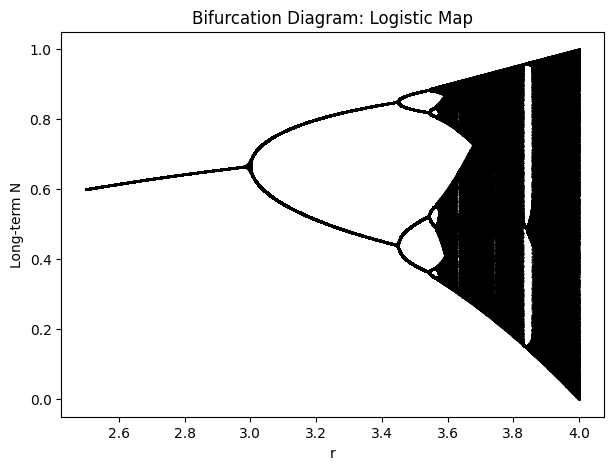

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(N, r):
    return r * N * (1 - N)

def bifurcation_diagram(r_min=2.5, r_max=4.0, steps=1000, discard=200, resolution=4000):
    """
    Generate (r, N) pairs for a bifurcation diagram of the logistic map:
       N_{t+1} = r * N_t * (1 - N_t).

    Parameters:
      r_min, r_max : range of r values.
      steps        : total number of iterations per r.
      discard      : how many initial iterations to discard as 'transient'.
      resolution   : how many r-values to sample.

    returns:
      (r_vals, N_vals) as arrays that can be plotted (scatter) to see the bifurcation.
    """
    r_values = np.linspace(r_min, r_max, resolution)
    r_list = []
    N_list = []

    for r in r_values:
        # start from random initial condition in (0,1)
        N = np.random.rand()
        # iterate for 'discard' steps to let transients die out
        for _ in range(discard):
            N = logistic_map(N, r)
        # now record the next 'steps-discard' values
        for _ in range(discard, steps):
            N = logistic_map(N, r)
            r_list.append(r)
            N_list.append(N)

    return np.array(r_list), np.array(N_list)

# run the bifurcation
r_bif, N_bif = bifurcation_diagram(
    r_min=2.5, r_max=4.0, steps=1000, discard=200, resolution=2000
)

# Plot the bifurcation diagram
plt.figure(figsize=(7,5))
plt.scatter(r_bif, N_bif, s=0.1, color='black')
plt.xlabel('r')
plt.ylabel('Long-term N')
plt.title('Bifurcation Diagram: Logistic Map')
plt.show()

### Interpreting Temperature & Cell-Size Effects as Parameter Shifts

In our earlier discussions, we had a *discrete logistic* model like:

$$
N_{t+1} = N_t + r(T,M) N_t\Bigl(1 - \frac{N_t}{K}\Bigr),
$$

or a version scaled so that $N_t \in [0,1]$, which might look like:

$$
N_{t+1} = r(T,M) N_t (1 - N_t).
$$

Here, we could define

$$
r(T,M) = r_0   M^{b-1} \exp \Bigl(-\tfrac{E}{k_B T}\Bigr).
$$

- As *temperature* $T$ increases, $r(T,M)$ *increases* (until proteins denature in real biology).  
- *Smaller* cell mass $M$ also *increases* the effective growth parameter ($M^{b-1}$ > 1 for $M<1$, in suitable units).  

Hence, *sweeping* $r$ from ~2.5 to 4.0 in the standard logistic map can be thought of as changing *temperature* and/or *cell size* in some continuous manner. In real systems, you might not sweep all the way to 4.0, but the *bifurcation* perspective reminds us that *discrete population dynamics* can become very complex at higher intrinsic growth rates.

Thus, *Bifurcation analysis* of the *discrete logistic map* reveals:
- *Stable equilibria* at low growth rates.  
- *Period-doubling* route to chaos as $r$ increases.  
- Complex behaviors including *periodic windows* embedded in chaos.


## Summary

* Microbial cell division is inherently discrete (integer splits), but at large population sizes, the overall population growth can be approximated by continuous models.
* Exponential growth describes unlimited resources, while logistic growth incorporates resource limitations and saturates at a carrying capacity.
* reaction rates (and thus growth) typically follow an Arrhenius/Eyring‐type increase with temperature—up to an optimal or denaturation point in real cells.
* Metabolic Theory suggests a mass ($M$) dependence (e.g., $M^{b-1}$ scaling) for metabolic and growth rates. Smaller microbes often have higher mass‐specific growth rates.
* real microbial growth can be more complex, including lag phases, variable yields, toxin accumulation, pH shifts, etc. The models here are minimal but illustrate the core ideas.
* If a microbe’s *division rate* (in discrete time) is strongly elevated (e.g., by high temperature), the population might enter regions of complex or oscillatory/chaotic dynamics under certain conditions.  
* Most laboratory cultures do not push $r$ to extremely high values in a single discrete step, but ecological systems (e.g., chemostats or large inflows of resources) can approach such regimes.

### References

- Arrhenius, S. 1889. *Über die reaktionsgeschwindigkeit bei Inversion von rohrzucker durch Säuren.* Z. Phys. Chem.
- Verhulst, P. 1838. *Notice sur la loi que la population poursuit dans son accroissement.* Corr. Math. Phys.
- West, G.B., Brown, J.H., & Enquist, B.J. 1997. *A general model for the origin of allometric scaling laws in biology.* Science, 276.
- Brown, J.H. et al. 2004. *Toward a Metabolic Theory of Ecology.* Ecology, 85, 1771–1789.
- ratkowsky, D.A. et al. 1982. *relationship between temperature and growth rate of bacterial cultures.* J. Bacteriol.
- Schaechter, M., Maaløe, O. & Kjeldgaard, N.O. 1958 & 1962. *Dependency on medium and temperature of cell size and chemical composition during balanced growth of Salmonella typhimurium.* J. Gen. Microbiol.
- May, r. M. (1976). *Simple mathematical models with very complicated dynamics.* Nature, 261, 459–467. (Seminal paper on logistic map chaos.)  
- Feigenbaum, M. J. (1978). *Quantitative universality for a class of nonlinear transformations.* Journal of Statistical Physics, 19, 25–52. (Period-doubling universality.)  